In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/statoil/composites/"

In [5]:
sz = 224

In [6]:
!ls {PATH}

models	test  tmp  train  valid


In [7]:
!ls {PATH}valid

iceberg  ship


In [8]:
files = !ls {PATH}valid/ship | head
files

['0.jpg',
 '1002.jpg',
 '101.jpg',
 '1021.jpg',
 '1030.jpg',
 '1036.jpg',
 '1053.jpg',
 '1056.jpg',
 '1072.jpg',
 '1083.jpg']

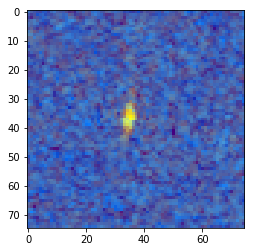

In [9]:
img = plt.imread(f'{PATH}valid/ship/{files[0]}')
plt.imshow(img);

In [10]:
img.shape

(75, 75, 4)

In [11]:
img[:4,:4]

array([[[ 69, 119, 191, 255],
        [ 74,  98, 171, 255],
        [ 64,  86, 172, 255],
        [ 58,  76, 171, 255]],

       [[ 64,  86, 172, 255],
        [ 69,  64, 155, 255],
        [ 71,  81, 162, 255],
        [ 26,  81, 202, 255]],

       [[ 64,  64, 159, 255],
        [ 74,  34, 137, 255],
        [ 82,  81, 153, 255],
        [ 69,  86, 167, 255]],

       [[ 76,  98, 169, 255],
        [ 78, 113, 177, 255],
        [ 71, 125, 193, 255],
        [ 80,  98, 165, 255]]], dtype=uint8)

In [12]:
#data = ImageClassifierData.from_paths(PATH,test_name='test',trn_name='train' ,tfms=tfms_from_model(resnet34, sz))


data = ImageClassifierData.from_paths(path=PATH, tfms=tfms_from_model(resnet34, sz), trn_name= 'train', val_name='valid', test_name='test')
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

In [ ]:
??learn.predict_with_targs

In [13]:
learn.fit(0.01,1)

A Jupyter Widget

[ 0.       0.18804  0.55544  0.70266]                     



In [14]:
learn.fit(0.009,1)

A Jupyter Widget

[ 0.       0.13566  0.42438  0.78481]                     



In [13]:
learn.fit(0.00848,1)

A Jupyter Widget

[ 0.       0.18883  0.52255  0.73736]                     



In [14]:
logs_preds_test = learn.predict(is_test=True)
preds_test = np.argmax(logs_preds_test, axis =1)
probs_test = np.exp(logs_preds_test[:,1])

In [17]:
probs_test

array([ 0.45228,  0.95121,  0.99928, ...,  0.17525,  0.99991,  0.98779], dtype=float32)

In [18]:
predict_with_targs

<function fastai.model.predict_with_targs>

In [19]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [20]:
data.classes

['iceberg', 'ship']

In [21]:
log_preds = learn.predict()

In [22]:
log_preds[:10]

array([[-0.44488, -1.02415],
       [-0.18558, -1.7756 ],
       [-1.12277, -0.3936 ],
       [-0.04351, -3.15643],
       [-0.05677, -2.89706],
       [-0.15575, -1.93639],
       [-0.56496, -0.84022],
       [-0.24832, -1.51463],
       [-0.11575, -2.21363],
       [-0.30337, -1.34067]], dtype=float32)

In [23]:
preds = np.argmax(log_preds, axis =1)
probs = np.exp(log_preds[:,1])

In [24]:
len(preds)


482

In [25]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [26]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

Correctly classified


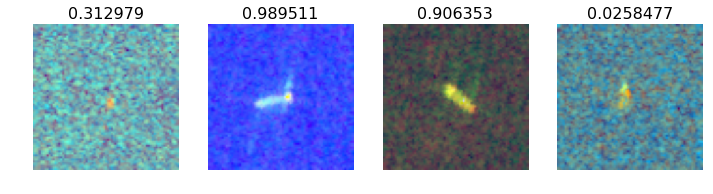

In [27]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


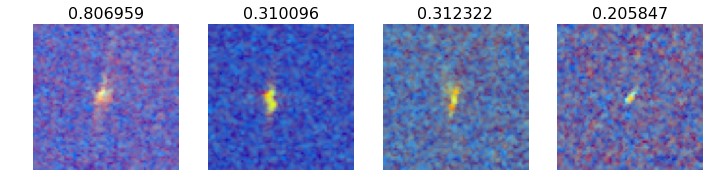

In [28]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [29]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct ships


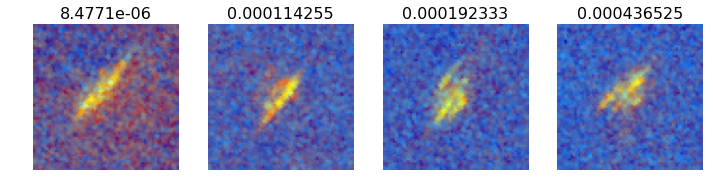

In [34]:
plot_val_with_title(most_by_correct(0, True), "Most correct ships")

Most correct bergs


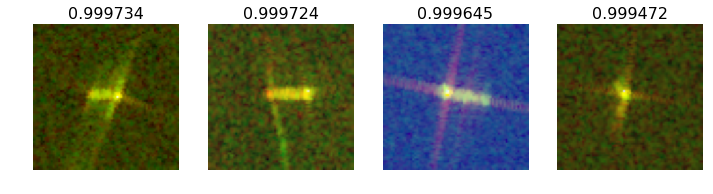

In [35]:
plot_val_with_title(most_by_correct(1, True), "Most correct bergs")

Most incorrect ships


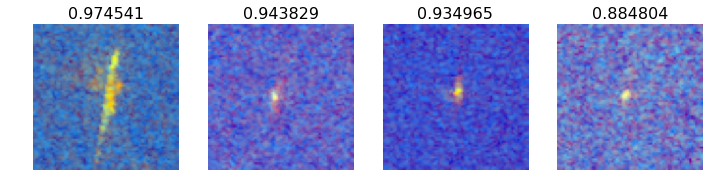

In [36]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect ships")

Most incorrect bergs


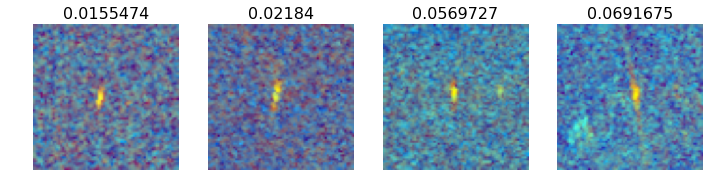

In [37]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect bergs")

Most uncertain predictions


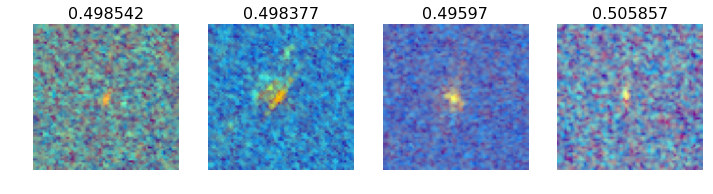

In [38]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [30]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

In [31]:
lrf=learn.lr_find()

A Jupyter Widget

[   0.         0.74867  288.21301    0.58376]             



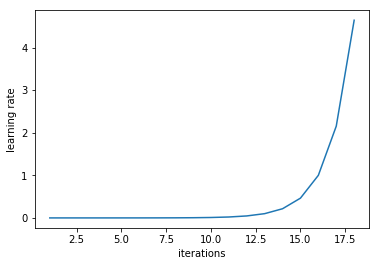

In [32]:
learn.sched.plot_lr()

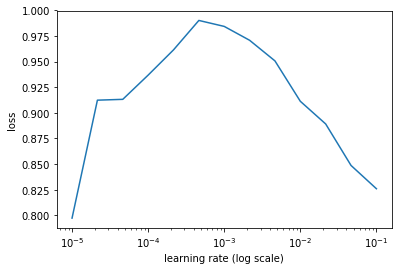

In [33]:
learn.sched.plot(n_skip=0)

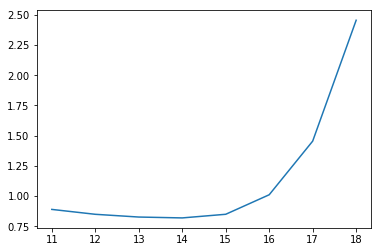

In [34]:
learn.sched.plot_loss()

In [35]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [45]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

## Further fine tuning

In [21]:
sample = pd.read_csv("data/statoil/sample_submission.csv")

In [24]:
sample['is_iceberg'] = preds_test

In [27]:
sample.to_csv("data/statoil/prediction1.csv",index=False)

In [36]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [37]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [38]:
ims = np.stack([get_augs() for i in range(6)])

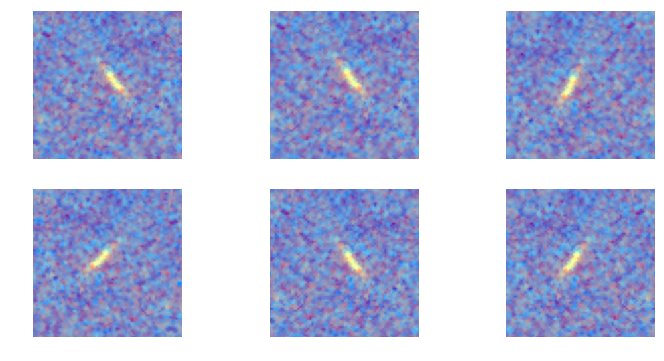

In [39]:
plots(ims, rows=2)

In [40]:
data = ImageClassifierData.from_paths(path=PATH, tfms=tfms_from_model(resnet34, sz), trn_name= 'train', val_name='valid', test_name='test')
#data = ImageClassifierData.from_paths(PATH, tfms=tfms)

In [41]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

In [42]:
learn.fit(0.00848, 1)

A Jupyter Widget

[ 0.       0.19473  0.64775  0.6875 ]                     



In [43]:
learn.precompute=False

In [44]:
learn.fit(0.00848, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.13113  0.48876  0.73541]                      
[ 1.       0.21236  0.4417   0.76769]                      
[ 2.       0.25956  0.42433  0.78918]                      



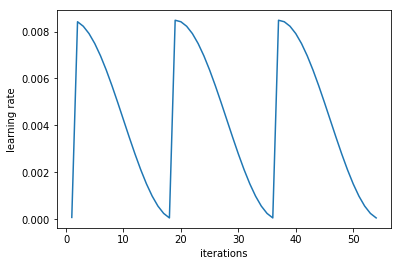

In [45]:
learn.sched.plot_lr()

In [46]:
lr=np.array([1e-5,1e-4,1e-3,1e-2])

In [47]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.1104   0.42136  0.78527]                      
[ 1.       0.18998  0.42164  0.78527]                      
[ 2.       0.24501  0.42124  0.78722]                      
[ 3.       0.27876  0.42539  0.78918]                      
[ 4.       0.3025   0.42713  0.78332]                      
[ 5.       0.31784  0.42408  0.79308]                      
[ 6.       0.32481  0.4244   0.78527]                      



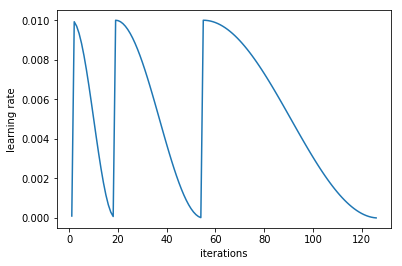

In [48]:
learn.sched.plot_lr()

In [49]:
log_preds,y = learn.TTA(is_test=True)
accuracy(log_preds,y)

0.31944444444444442

In [50]:
preds_test = np.argmax(log_preds, axis =1)
probs_test = np.exp(log_preds[:,1])

In [51]:
probs_test

array([ 0.64952,  0.3037 ,  0.99988, ...,  0.45293,  0.99999,  0.01932], dtype=float32)

In [54]:
sample = pd.read_csv("data/statoil/sample_submission.csv")

## doing a quick check 

In [138]:
# for i in range(len(preds_test)):
#     preds_test[i] = 1 - preds_test[i]

In [114]:
# sample['is_iceberg'] = preds_test

In [115]:
sample.to_csv("data/statoil/prediction1.csv",index=False)

In [116]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[2160 6264]
 [   0    0]]


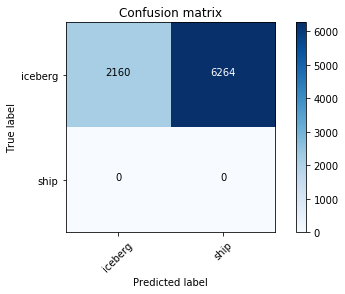

In [118]:
plot_confusion_matrix(cm, data.classes)

/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  import sys


Most incorrect ships


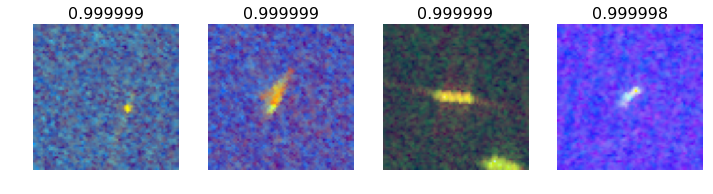

In [119]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect ships")

/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  import sys


Most incorrect bergs


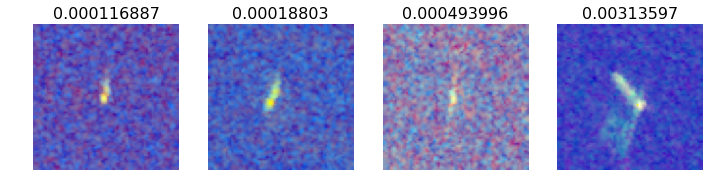

In [121]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect bergs")

In [126]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:2]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

IndexError: list index out of range